In [1]:
import bnlearn as bn
import pandas as pd
import numpy as np

C:\Users\javie\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\javie\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df=pd.read_csv('../data/hotel_bookings.csv') #cargamos datos
#dfhot, dfnum = bn.df2onehot(df.sample(frac=0.3,random_state=42))

In [3]:
df.columns # veo columnas

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.notna().sum().sort_values(ascending=True) #compruebo integridad de los datos, elimino company, muy pocos datos, elimino filas con datos restandes de agente country y children

company                             6797
agent                             103050
country                           118902
children                          119386
hotel                             119390
total_of_special_requests         119390
required_car_parking_spaces       119390
adr                               119390
customer_type                     119390
days_in_waiting_list              119390
deposit_type                      119390
booking_changes                   119390
assigned_room_type                119390
reserved_room_type                119390
previous_bookings_not_canceled    119390
previous_cancellations            119390
distribution_channel              119390
reservation_status                119390
market_segment                    119390
meal                              119390
babies                            119390
adults                            119390
stays_in_week_nights              119390
stays_in_weekend_nights           119390
arrival_date_day

In [6]:
df.drop(['company'],axis=1,inplace=True)
df['children'].fillna(0,inplace=True)
df["meal"].replace({"Undefined": "SC", }, inplace=True) #las reservas con regimen sin definir las convertimos en reservas sin regimen 
df['country'].fillna('Unkown',inplace=True)
df['agent'].fillna(-1,inplace=True)
filter = (df.children != 0) | (df.adults != 0) | (df.babies != 0)
df=df[filter]

In [7]:
df.notna().sum().sort_values(ascending=True)

hotel                             119210
total_of_special_requests         119210
required_car_parking_spaces       119210
adr                               119210
customer_type                     119210
days_in_waiting_list              119210
agent                             119210
deposit_type                      119210
booking_changes                   119210
assigned_room_type                119210
reserved_room_type                119210
previous_bookings_not_canceled    119210
previous_cancellations            119210
is_repeated_guest                 119210
reservation_status                119210
distribution_channel              119210
country                           119210
meal                              119210
babies                            119210
children                          119210
adults                            119210
stays_in_week_nights              119210
stays_in_weekend_nights           119210
arrival_date_day_of_month         119210
arrival_date_wee

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test=train_test_split(df,test_size=0.01,random_state=42)

In [9]:
dfhot_train, dfnum_train = bn.df2onehot(X_train)
dfhot_test, dfnum_test = bn.df2onehot(X_test)

  0%|          | 0/31 [00:00<?, ?it/s]


[df2onehot] >Auto detecting dtypes.


100%|██████████| 31/31 [00:13<00:00,  2.30it/s]


[df2onehot] >Set dtypes in dataframe..


100%|██████████| 31/31 [00:42<00:00,  1.36s/it]


[df2onehot] >Total onehot features: 1707


 13%|█▎        | 4/31 [00:00<00:00, 31.09it/s]


[df2onehot] >Auto detecting dtypes.


100%|██████████| 31/31 [00:00<00:00, 34.12it/s]


[df2onehot] >Set dtypes in dataframe..


100%|██████████| 31/31 [00:02<00:00, 13.69it/s]

[df2onehot] >Total onehot features: 199


In [10]:
##
#
#
#
# ESCALAR VARIABLES NUMERICAS NO CATEGORICAS, COMO DIAS DE ESTANCIA
#
# NUMERO DE ADULTOS NINOS NO SE ESCALA, ES UNA CATEGORIA IGUAL QUE MES SEMANA DIA DE LLEGADA
#
#

In [11]:
from sklearn.feature_selection import SelectKBest

aux=SelectKBest(k=15)
aux.fit_transform(dfnum_train.drop(['is_canceled'],axis=1),dfnum_train['is_canceled'])
k_filter = aux.get_support()
features = np.array(dfnum_train.drop(['is_canceled'],axis=1).columns)
 

print("Selected best 15:")
print(features[k_filter])
(dfnum_train[features[k_filter]].head())
dfnum_train_15k=dfnum_train[features[k_filter]]
dfnum_train_15k['is_canceled']=dfnum_train['is_canceled']
dfnum_train_15k.columns

Selected best 15:
['hotel' 'country' 'distribution_channel' 'is_repeated_guest'
 'previous_cancellations' 'previous_bookings_not_canceled'
 'assigned_room_type' 'booking_changes' 'deposit_type'
 'days_in_waiting_list' 'customer_type' 'required_car_parking_spaces'
 'total_of_special_requests' 'reservation_status'
 'reservation_status_date']


Index(['hotel', 'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_canceled'],
      dtype='object')

In [12]:
X_test_15k=dfnum_test[features[k_filter]]
X_test_15k['is_canceled']=dfnum_test['is_canceled']

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


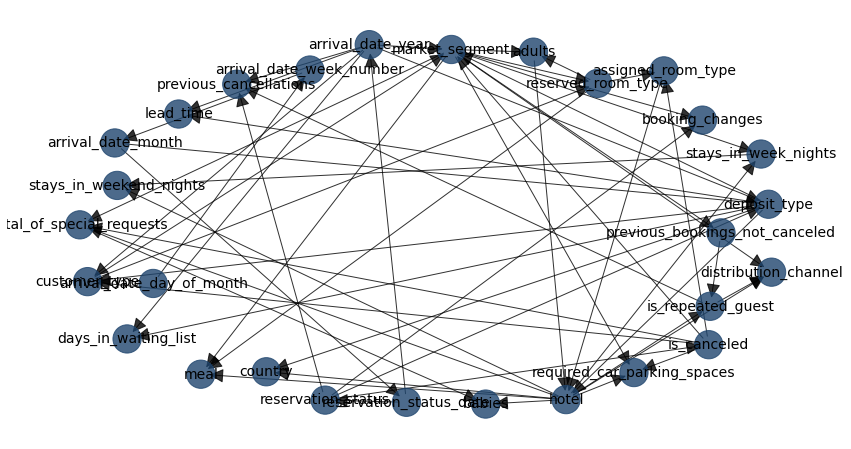

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
[bnlearn] >CPD of hotel:
+--------------------+-----+------------------------+
| adults             | ... | adults(5)              |
+--------------------+-----+------------------------+
| assigned_room_type | ... | assigned_room_type(10) |
+--------------------+-----+------------------------+
| deposit_type       | ... | deposit_type(3)        |
+--------------------+-----+------------------------+
| hotel(0)           | ... | 0.5                    |
+--------------------+-----+------------------------+
| hotel(1)           | ... | 0.5                    |
+--------------------+-----+------------------------+
[bnlearn] >CPD of stays_in_weekend_nights:
+-----------------------------+-----+--------------------------+
| hotel                       | ... | hotel(1)                 |
+-----------------------------+-----+--------------------------+
| stays_in_week_nights     

In [13]:
DAG = bn.structure_learning.fit(dfnum_train)
bn.plot(DAG)
model = bn.parameter_learning.fit(DAG, dfnum_train,methodtype="bayes")


In [14]:
q1=bn.inference.fit(model,variables=['is_canceled'], evidence={'hotel':1,'distribution_channel':2})
print(q1)

[bnlearn] >Variable Elimination..


Eliminating: arrival_date_year: 100%|██████████| 14/14 [00:00<00:00, 98.16it/s]

+----+---------------+----------+
|    |   is_canceled |        p |
+====+===============+==========+
|  0 |             0 | 0.790944 |
+----+---------------+----------+
|  1 |             1 | 0.209056 |
+----+---------------+----------+
+----------------+--------------------+
| is_canceled    |   phi(is_canceled) |
+================+====================+
| is_canceled(0) |             0.7909 |
+----------------+--------------------+
| is_canceled(1) |             0.2091 |
+----------------+--------------------+


In [15]:
#predic = bn.predict(model, evidence, verbose=0,variables=['is_canceled'])
#print(predic)

In [16]:
evidence=dfnum_test.drop(['is_canceled'],axis=1)
print(evidence.shape)
dict(evidence.iloc[0])

(1193, 27)


{'hotel': 0,
 'lead_time': 0,
 'arrival_date_year': 3,
 'arrival_date_month': 6,
 'arrival_date_week_number': 19,
 'arrival_date_day_of_month': 26,
 'stays_in_weekend_nights': 1,
 'stays_in_week_nights': 3,
 'adults': 2,
 'babies': 0,
 'meal': 2,
 'country': 6,
 'market_segment': 4,
 'distribution_channel': 3,
 'is_repeated_guest': 0,
 'previous_cancellations': 0,
 'previous_bookings_not_canceled': 0,
 'reserved_room_type': 1,
 'assigned_room_type': 1,
 'booking_changes': 1,
 'deposit_type': 0,
 'days_in_waiting_list': 0,
 'customer_type': 3,
 'required_car_parking_spaces': 0,
 'total_of_special_requests': 1,
 'reservation_status': 2,
 'reservation_status_date': 560}

In [17]:
predic = bn.predict(model, evidence, verbose=0,variables=['is_canceled'])
#print(predic)

100%|██████████| 1167/1167 [14:31<00:00,  1.34it/s]


In [28]:
predic['is_canceled'].values
X_test['is_canceled'].values

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [36]:
predic=bn.inference.fit(model,variables=['is_canceled'], evidence=  dict(evidence))
print(predic)
X_test['is_canceled'][1]

[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]n Order: : : 0it [00:00, ?it/s]

+----+---------------+------------+
|    |   is_canceled |          p |
+====+===============+============+
|  0 |             0 | 0.993988   |
+----+---------------+------------+
|  1 |             1 | 0.00601243 |
+----+---------------+------------+
+----------------+--------------------+
| is_canceled    |   phi(is_canceled) |
+================+====================+
| is_canceled(0) |             0.9940 |
+----------------+--------------------+
| is_canceled(1) |             0.0060 |
+----------------+--------------------+


0

In [17]:
predic=[]

for i in range(len(evidence)):
    predic.append(bn.inference.fit(model,variables=['is_canceled'],verbose=0,to_df=False, evidence=  dict(evidence.iloc[i])))
    

print(predic[0:5])
print((evidence.iloc[0]))
X_test['is_canceled'][1]

[<DiscreteFactor representing phi(is_canceled:2) at 0x1b54b1b94c0>, <DiscreteFactor representing phi(is_canceled:2) at 0x1b5836b2d00>, <DiscreteFactor representing phi(is_canceled:2) at 0x1b54b1b9160>, <DiscreteFactor representing phi(is_canceled:2) at 0x1b54b1b99a0>, <DiscreteFactor representing phi(is_canceled:2) at 0x1b54b1b9c70>]
hotel                               0
lead_time                           0
arrival_date_year                   3
arrival_date_month                  6
arrival_date_week_number           19
arrival_date_day_of_month          26
stays_in_weekend_nights             1
stays_in_week_nights                3
adults                              2
babies                              0
meal                                2
country                             6
market_segment                      4
distribution_channel                3
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type

0

In [30]:
from sklearn import metrics

print(metrics.classification_report(X_test['is_canceled'].values,predic['is_canceled'].values))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       769
           1       1.00      0.91      0.95       424

    accuracy                           0.97      1193
   macro avg       0.98      0.95      0.96      1193
weighted avg       0.97      0.97      0.97      1193



In [43]:
print(X_test.drop(['is_canceled'],axis=1).columns.values)

['hotel' 'lead_time' 'arrival_date_year' 'arrival_date_month'
 'arrival_date_week_number' 'arrival_date_day_of_month'
 'stays_in_weekend_nights' 'stays_in_week_nights' 'adults' 'children'
 'babies' 'meal' 'country' 'market_segment' 'distribution_channel'
 'is_repeated_guest' 'previous_cancellations'
 'previous_bookings_not_canceled' 'reserved_room_type'
 'assigned_room_type' 'booking_changes' 'deposit_type' 'agent'
 'days_in_waiting_list' 'customer_type' 'adr'
 'required_car_parking_spaces' 'total_of_special_requests'
 'reservation_status' 'reservation_status_date']


In [47]:
predic=bn.inference.fit(model,variables=['hotel','meal', 'reservation_status_date'], evidence=  {'is_canceled':1})
print(predic)

[bnlearn] >Variable Elimination..


Eliminating: arrival_date_year: 100%|██████████| 11/11 [00:00<00:00, 23.57it/s]